# **Trabalho de TCC2 - Aplicando SVR para predizer a frequência de ressonância de antenas de microfita**

**Importação e instalação das bibliotecas necessárias**

In [1]:
# Importing some libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from scipy.constants import c
from pathlib import Path

**Download dos Datasets diretamente do Google Drive**

In [2]:
# Download all necessary datasets from google drive
!gdown 1B7K2d6nCGhCU59lnIqtFvr0VKXFPrVFg # Real_2,2  nova simulação
!gdown 1uk4Rbq5LiNVOvSJRe4gmgLKvNGhihrAl # Real_3,0  nova simulação
!gdown 1XuQhSzgyFKI_YnZiyG2ngdM3mpin4vtH # Real_4,4  nova simulação
!gdown 1-RJKUOEUTOBFzDWD93IkgisCpSEyNGq3 # Real_6,15 nova simulação
!gdown 1qhGjvbz0P78N2749TOr7ArRN8OblvY9s # Real_10,2 nova simulação

Downloading...
From: https://drive.google.com/uc?id=1B7K2d6nCGhCU59lnIqtFvr0VKXFPrVFg
To: /content/Real_2_2.csv
100% 1.03M/1.03M [00:00<00:00, 46.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1uk4Rbq5LiNVOvSJRe4gmgLKvNGhihrAl
To: /content/Real_3_0.csv
100% 1.03M/1.03M [00:00<00:00, 118MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XuQhSzgyFKI_YnZiyG2ngdM3mpin4vtH
To: /content/Real_4_4.csv
100% 1.03M/1.03M [00:00<00:00, 106MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-RJKUOEUTOBFzDWD93IkgisCpSEyNGq3
To: /content/Real_6_15.csv
100% 1.03M/1.03M [00:00<00:00, 128MB/s]
Downloading...
From: https://drive.google.com/uc?id=1qhGjvbz0P78N2749TOr7ArRN8OblvY9s
To: /content/Real_10_2.csv
100% 1.02M/1.02M [00:00<00:00, 72.6MB/s]


---

## **Exploratory Data Analysis**

**Leitura dos arquivos .csv gerados pelo ANSYS**

In [3]:
# Reading all datasets (1 from each value of epsilon)
arq1 = 'Real_2_2'

df1 = pd.read_csv(arq1 +'.csv')


arq2 = 'Real_3_0'
df2 = pd.read_csv(arq2 +'.csv')


arq3 = 'Real_4_4'
df3 = pd.read_csv(arq3 +'.csv')


arq4 = 'Real_6_15'
df4 = pd.read_csv(arq4 +'.csv')


arq5 = 'Real_10_2'
df5 = pd.read_csv(arq5 +'.csv')

In [4]:
df1.iloc[19600:19650,:]

,L [mm],Freq [GHz],"re(Z(1,1)) []"
19600,103.989899,0.900000,0.482679
19601,103.989899,0.960804,9.183547
19602,103.989899,1.021608,0.419475
19603,103.989899,1.082412,0.371359
19604,103.989899,1.143216,0.419043
19605,103.989899,1.204020,0.514290
19606,103.989899,1.264824,0.699451
19607,103.989899,1.325628,1.148313
19608,103.989899,1.386432,2.937879
19609,103.989899,1.447236,49.818734


**Renomeando a coluna do Dataset original para possibilitar um acesso mais fácil a métodos do Dataframe**

In [5]:
# Renaming some columns names
df1.rename(
    columns={"L [mm]": "L", "Freq [GHz]": "Freq", "re(Z(1,1)) []": "re"},
    inplace=True,
)

df2.rename(
    columns={"L [mm]": "L", "Freq [GHz]": "Freq", "re(Z(1,1)) []": "re"},
    inplace=True,
)

df3.rename(
    columns={"L [mm]": "L", "Freq [GHz]": "Freq", "re(Z(1,1)) []": "re"},
    inplace=True,
)

df4.rename(
    columns={"L [mm]": "L", "Freq [GHz]": "Freq", "re(Z(1,1)) []": "re"},
    inplace=True,
)

df5.rename(
    columns={"L [mm]": "L", "Freq [GHz]": "Freq", "re(Z(1,1)) []": "re"},
    inplace=True,
)

**Adicionando uma coluna para h e adicionando uma coluna com L como tipo str para fazer query**

In [6]:
# Adding a column for 'h' in each dataset
df1['h'] = df1['L'] * 0.0479
df2['h'] = df2['L'] * 0.0479
df3['h'] = df3['L'] * 0.0479
df4['h'] = df4['L'] * 0.0479
df5['h'] = df5['L'] * 0.0479

**Adicionando uma coluna com L como tipo str para fazer query**

In [7]:
# Adding another 'L' column to the dataset, but as string type, as it will help
# creating subdatasets using pandas query method
df1['L2'] = df1['L'].astype('str')
df2['L2'] = df2['L'].astype('str')
df3['L2'] = df3['L'].astype('str')
df4['L2'] = df4['L'].astype('str')
df5['L2'] = df5['L'].astype('str')

In [8]:
# Shape (number_of_rows, number_of_columns) of the dataset at its current state
df1.shape

(20000, 5)

**Criando um novo diretório para trabalhar com os datasets de forma mais simples**

In [9]:
# Creating a subfolder for storing all subdatasets and easiness to work
pasta = Path("subdatasets")
pasta.mkdir(exist_ok=True) # Cria uma nova pasta com o nome "subdatasets" caso ela já não exista

**Obtendo o caminho do diretório atual**

In [10]:
# Gets the current workin directory
cur_dir = Path.cwd()
cur_dir

PosixPath('/content')

**Troca o diretório para o diretório criado, armazenando todos os subdatasets criados a partir daqui nessa pasta.**

In [11]:
# Creates a subdirectory and changes the current working directory to the one
# created
os.chdir(str(cur_dir) + r'/subdatasets')

In [12]:
Path.cwd()

PosixPath('/content/subdatasets')

**Criação de todos os subdatasets para os diferentes valores de L e de ϵ**

In [13]:
# Make subdatasets separated by 'L' values using pandas queries to loop over
# an 'L2' column of a dataset, getting all the rows that satisfies the condition
# with its names truncated and with the 1st '.' replaced by '_' using
# str(round(float(x), 2)).replace(".", "_", 1). Same goes for all the other 4
# datasets below

for i in df1['L']:
    x = str(i)
    query_criador_subdatasets1 = df1.query("L2 == @x")
    query_criador_subdatasets1.to_csv('sub' + arq1 + '_' + str(round(float(x), 2)).replace(".", "_", 1) + '.csv', index=False)

In [14]:
for i in df2['L']:
    x = str(i)
    query_criador_subdatasets2 = df2.query("L2 == @x")
    query_criador_subdatasets2.to_csv('sub' + arq2 + '_' + str(round(float(x), 2)).replace(".", "_", 1) + '.csv', index=False)

In [15]:
for i in df3['L']:
    x = str(i)
    query_criador_subdatasets3 = df3.query("L2 == @x")
    query_criador_subdatasets3.to_csv('sub' + arq3 + '_' + str(round(float(x), 2)).replace(".", "_", 1) + '.csv', index=False)

In [16]:
for i in df4['L']:
    x = str(i)
    query_criador_subdatasets4 = df4.query("L2 == @x")
    query_criador_subdatasets4.to_csv('sub' + arq4 + '_' + str(round(float(x), 2)).replace(".", "_", 1) + '.csv', index=False)

In [17]:
for i in df5['L']:
    x = str(i)
    query_criador_subdatasets5 = df5.query("L2 == @x")
    query_criador_subdatasets5.to_csv('sub' + arq5 + '_' + str(round(float(x), 2)).replace(".", "_", 1) + '.csv', index=False)

Listando os arquivos contidos na pasta

In [18]:
# Shows all .csv files in the current working directory
arquivos = Path.cwd().glob('**/*.csv')
list(arquivos)

[PosixPath('/content/subdatasets/subReal_2_2_52_47.csv'),
 PosixPath('/content/subdatasets/subReal_3_0_28_18.csv'),
 PosixPath('/content/subdatasets/subReal_2_2_6_01.csv'),
 PosixPath('/content/subdatasets/subReal_10_2_48_06.csv'),
 PosixPath('/content/subdatasets/subReal_4_4_29_75.csv'),
 PosixPath('/content/subdatasets/subReal_10_2_15_58.csv'),
 PosixPath('/content/subdatasets/subReal_3_0_53_94.csv'),
 PosixPath('/content/subdatasets/subReal_3_0_36_77.csv'),
 PosixPath('/content/subdatasets/subReal_10_2_21_88.csv'),
 PosixPath('/content/subdatasets/subReal_6_15_9_26.csv'),
 PosixPath('/content/subdatasets/subReal_10_2_41_76.csv'),
 PosixPath('/content/subdatasets/subReal_6_15_42_45.csv'),
 PosixPath('/content/subdatasets/subReal_3_0_66_82.csv'),
 PosixPath('/content/subdatasets/subReal_3_0_19_6.csv'),
 PosixPath('/content/subdatasets/subReal_2_2_24_19.csv'),
 PosixPath('/content/subdatasets/subReal_4_4_70_76.csv'),
 PosixPath('/content/subdatasets/subReal_2_2_78_74.csv'),
 PosixPath(

**Criando dicionários que irão conter um certo padrão que condiz com o SubDataset.**

In [19]:
# Making copies of each 'L' Series from each dataset with further purpose of
# looping over it, given that this parammeter is totaly different in each
# dataset. Only one value of each 'L' is necessary and the index has to be
# reseted, and also the series is parsed to a numpy ndarray.

df1_L = df1['L'].copy()
df1_L.drop_duplicates(inplace=True)
df1_L.reset_index(inplace=True, drop=True)
df1_L = df1_L.to_numpy()

In [20]:
df2_L = df2['L'].copy()
df2_L.drop_duplicates(inplace=True)
df2_L.reset_index(inplace=True, drop=True)
df2_L = df2_L.to_numpy()

In [21]:
df3_L = df3['L'].copy()
df3_L.drop_duplicates(inplace=True)
df3_L.reset_index(inplace=True, drop=True)
df3_L = df3_L.to_numpy()

In [22]:
df4_L = df4['L'].copy()
df4_L.drop_duplicates(inplace=True)
df4_L.reset_index(inplace=True, drop=True)
df4_L = df4_L.to_numpy()

In [23]:
df5_L = df5['L'].copy()
df5_L.drop_duplicates(inplace=True)
df5_L.reset_index(inplace=True, drop=True)
df5_L = df5_L.to_numpy()

In [24]:
# Shapes of all the different copies created on the previous step
df1_L.shape, df2_L.shape, df3_L.shape, df4_L.shape, df5_L.shape

((100,), (100,), (100,), (100,), (100,))

**Cálculo de todas as frequências de ressonância de acordo com o valor de ϵ**

A equação é:


$\left( \frac{c}{2 * L * \sqrt{ ϵ}} \right) [Hz]$

 $f_{r} = \left( \frac{ 5c \times 10^{-7} } { L\sqrt{\epsilon} } \right) \; \;[GHz]$

 $L = \left( \frac{ 5c \times 10^{-7}}{f_{r}\sqrt{\epsilon}} \right) \; \;[mm]$

Onde $\textit{c}$ é a velocidade da luz e os valores de $L$ devem ser passados em $mm$ e $f_{r}$ em $GHz$


In [25]:
# Going through the L values for the different datasets to calculate the
# different resonant frequencies. To keep the frequency range the same for all
# datasets, the L values are different for each epsilon value

from math import sqrt
import numpy as np
from scipy.constants import c


df1_L_min = min(df1['L'])
df1_L_max = max(df1['L'])

df2_L_min = min(df2['L'])
df2_L_max = max(df2['L'])

df3_L_min = min(df3['L'])
df3_L_max = max(df3['L'])

df4_L_min = min(df4['L'])
df4_L_max = max(df4['L'])

df5_L_min = min(df5['L'])
df5_L_max = max(df5['L'])


step1 = 6.01010101010101 - 5
step2 = 5.85858585858586 - 5
step3 = 5.70707070707071 - 5
step4 = 3.62626262626263 - 3
step5 = 2.48484848484848 - 2

lista_l_1 = np.arange(df1_L_min, df1_L_max + 0.2, step=step1, dtype=np.float64)
lista_l_2 = np.arange(df2_L_min, df2_L_max + 0.2, step=step2, dtype=np.float64)
lista_l_3 = np.arange(df3_L_min, df3_L_max + 0.2, step=step3, dtype=np.float64)
lista_l_4 = np.arange(df4_L_min, df4_L_max + 0.2, step=step4, dtype=np.float64)
lista_l_5 = np.arange(df5_L_min, df5_L_max + 0.2, step=step5, dtype=np.float64)


# Função que gera as frequências de ressonância calculadas
def gerar_frequencias(lista_freq:list, eps):
    fr_0_GHz = [(5*c*(10**-7))/(elem * np.sqrt(eps)) for elem in lista_freq]
    return fr_0_GHz


# Chamando a função gerar_frequencias para mapear as frequências de ressonância
# de acordo com o epsilon desejado
lista_freq_epsilon_2_20 = gerar_frequencias(df1_L, eps=2.2)
lista_freq_epsilon_3_00 = gerar_frequencias(df2_L, eps=3)
lista_freq_epsilon_4_40 = gerar_frequencias(df3_L, eps=4.4)
lista_freq_epsilon_6_15 = gerar_frequencias(df4_L, eps=6.15)
lista_freq_epsilon_10_2 = gerar_frequencias(df5_L, eps=10.2)

# Print estético para separação de linhas
print('\-/-\-/'*100)


# Print das listas contendo todos os valores de L e todas as frequências de
# ressonância calculadas para os diferentes valores de L e de epsilon_r
print('Cálculo de valores da frequência de ressonância para todos os valores de epsilon:')
print('\-/-\-/'*100)
print("\n")
print(f"Valores de L[mm] para epsilon = 2.2: {df1_L}")
print("\n")
print('\-/-\-/'*100)
print(f"Valores de L[mm] para epsilon = 3.0: {df2_L}")
print("\n")
print('\-/-\-/'*100)
print(f"Valores de L[mm] para epsilon = 4.4: {df3_L}")
print("\n")
print('\-/-\-/'*100)
print(f"Valores de L[mm] para epsilon = 6.15: {df4_L}")
print("\n")
print('\-/-\-/'*100)
print(f"Valores de L[mm] para epsilon = 10.2: {df5_L}")
print("\n")
print('\-/-\-/'*100)
print(f"Frequências de ressonância para epsilon =  02.20 [GHz]:   {lista_freq_epsilon_2_20}")
print(f"Frequências de ressonância para epsilon =  03.00 [GHz]:   {lista_freq_epsilon_3_00}")
print(f"Frequências de ressonância para epsilon =  04.40 [GHz]:   {lista_freq_epsilon_4_40}")
print(f"Frequências de ressonância para epsilon =  06.15 [GHz]:   {lista_freq_epsilon_6_15}")
print(f"Frequências de ressonância para epsilon =  10.20 [GHz]:   {lista_freq_epsilon_10_2}")

# Print estético para separação de linhas
print("\n")
print('\-/-\-/'*100)


\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/
Cálculo de valores da frequência de ressonância para todos os valores de epsilon:
\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/\-/-\-/

In [26]:
# Grouping the datasets in a dictionary by the epsilon value
dict_2_2 = {}
dict_3_0 = {}
dict_4_4 = {}
dict_6_15 = {}
dict_10_2 = {}


for i in df1_L:
    dict_2_2.update({'Real_2_2_' + str(round(i, 2)).replace(".", "_", 1): pd.read_csv('sub' + 'Real_2_2_' + str(round(i, 2)).replace(".", "_", 1) + '.csv')})

for i in df2_L:
    dict_3_0.update({'Real_3_0_' + str(round(i, 2)).replace(".", "_", 1): pd.read_csv('sub' + 'Real_3_0_' + str(round(i, 2)).replace(".", "_", 1) + '.csv')})

for i in df3_L:
    dict_4_4.update({'Real_4_4_' + str(round(i, 2)).replace(".", "_", 1): pd.read_csv('sub' + 'Real_4_4_' + str(round(i, 2)).replace(".", "_", 1) + '.csv')})

for i in df4_L:
    dict_6_15.update({'Real_6_15_' + str(round(i, 2)).replace(".", "_", 1): pd.read_csv('sub' + 'Real_6_15_' + str(round(i, 2)).replace(".", "_", 1) + '.csv')})

for i in df5_L:
    dict_10_2.update({'Real_10_2_' + str(round(i, 2)).replace(".", "_", 1): pd.read_csv('sub' + 'Real_10_2_' + str(round(i, 2)).replace(".", "_", 1) + '.csv')})


**Mostrando um dos SubDatasets atualizados**

In [27]:
# Information about 'dict_2_2['Real_2_2_5_0']'
dict_2_2['Real_2_2_10_05'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   L       200 non-null    float64
 1   Freq    200 non-null    float64
 2   re      200 non-null    float64
 3   h       200 non-null    float64
 4   L2      200 non-null    float64
dtypes: float64(5)
memory usage: 7.9 KB


In [28]:
# Showing the data
dict_2_2

{'Real_2_2_5_0':        L       Freq         re       h   L2
 0    5.0   1.000000   0.142080  0.2395  5.0
 1    5.0   1.045226   0.138841  0.2395  5.0
 2    5.0   1.090452   0.136163  0.2395  5.0
 3    5.0   1.135678   0.133970  0.2395  5.0
 4    5.0   1.180905   0.132204  0.2395  5.0
 ..   ...        ...        ...     ...  ...
 195  5.0   9.819095  19.506870  0.2395  5.0
 196  5.0   9.864322  21.775858  0.2395  5.0
 197  5.0   9.909548  24.456796  0.2395  5.0
 198  5.0   9.954774  27.653231  0.2395  5.0
 199  5.0  10.000000  31.502634  0.2395  5.0
 
 [200 rows x 5 columns],
 'Real_2_2_6_01':             L       Freq          re         h        L2
 0    6.010101   1.000000    0.149672  0.287884  6.010101
 1    6.010101   1.045226    0.148058  0.287884  6.010101
 2    6.010101   1.090452    0.146884  0.287884  6.010101
 3    6.010101   1.135678    0.146106  0.287884  6.010101
 4    6.010101   1.180905    0.145690  0.287884  6.010101
 ..        ...        ...         ...       ...     

In [29]:
# Showing the last 50 values of this specific dataset for epsilon = 3 and
# L = 78.84 mm
dict_3_0['Real_3_0_78_84'].tail(50)

,L,Freq,re,h,L2
150,78.838384,8.513065,101.046888,3.776359,78.838384
151,78.838384,8.563819,111.758820,3.776359,78.838384
152,78.838384,8.614573,81.381586,3.776359,78.838384
153,78.838384,8.665327,54.961094,3.776359,78.838384
154,78.838384,8.716080,41.114125,3.776359,78.838384
155,78.838384,8.766834,35.269867,3.776359,78.838384
156,78.838384,8.817588,35.870913,3.776359,78.838384
157,78.838384,8.868342,44.311950,3.776359,78.838384
158,78.838384,8.919095,53.881868,3.776359,78.838384
159,78.838384,8.969849,47.292824,3.776359,78.838384


**Utilizando a janela móvel para descobrir os picos e vales dos dados discretos dos Datasets**

In [30]:
# Using a rolling window to find wich points are bigger than the previous one
# evaluating the 'max_re' column. A new column 'pico_re' is also initialized
# with False
window_size = 1

for i in df1_L:
    dict_2_2['Real_2_2_' + str(round(i, 2)).replace(".", "_", 1)]['max_re'] = dict_2_2['Real_2_2_' + str(round(i, 2)).replace(".", "_", 1)]['re'].rolling(window_size, min_periods=0).max()
    dict_2_2['Real_2_2_' + str(round(i, 2)).replace(".", "_", 1)]['Maior_que_anterior'] = (dict_2_2['Real_2_2_' + str(round(i, 2)).replace(".", "_", 1)]['re'] == dict_2_2['Real_2_2_' + str(round(i, 2)).replace(".", "_", 1)]['max_re']) & (dict_2_2['Real_2_2_' + str(round(i, 2)).replace(".", "_", 1)]['re'] > dict_2_2['Real_2_2_' + str(round(i, 2)).replace(".", "_", 1)]['re'].shift())
    dict_2_2['Real_2_2_' + str(round(i, 2)).replace(".", "_", 1)]['Pico_re'] = False


for i in df2_L:
    dict_3_0['Real_3_0_' + str(round(i, 2)).replace(".", "_", 1)]['max_re'] = dict_3_0['Real_3_0_' +  str(round(i, 2)).replace(".", "_", 1)]['re'].rolling(window_size, min_periods=0).max()
    dict_3_0['Real_3_0_' + str(round(i, 2)).replace(".", "_", 1)]['Maior_que_anterior'] = (dict_3_0['Real_3_0_' +  str(round(i, 2)).replace(".", "_", 1)]['re'] == dict_3_0['Real_3_0_' +  str(round(i, 2)).replace(".", "_", 1)]['max_re']) & (dict_3_0['Real_3_0_' +  str(round(i, 2)).replace(".", "_", 1)]['re'] > dict_3_0['Real_3_0_' +  str(round(i, 2)).replace(".", "_", 1)]['re'].shift())
    dict_3_0['Real_3_0_' + str(round(i, 2)).replace(".", "_", 1)]['Pico_re'] = False



for i in df3_L:
    dict_4_4['Real_4_4_' + str(round(i, 2)).replace(".", "_", 1)]['max_re'] =  dict_4_4['Real_4_4_' +  str(round(i, 2)).replace(".", "_", 1)]['re'].rolling(window_size, min_periods=0).max()
    dict_4_4['Real_4_4_' + str(round(i, 2)).replace(".", "_", 1)]['Maior_que_anterior'] = (dict_4_4['Real_4_4_' +  str(round(i, 2)).replace(".", "_", 1)]['re'] ==  dict_4_4['Real_4_4_' +  str(round(i, 2)).replace(".", "_", 1)]['max_re']) & ( dict_4_4['Real_4_4_' +  str(round(i, 2)).replace(".", "_", 1)]['re'] >  dict_4_4['Real_4_4_' +  str(round(i, 2)).replace(".", "_", 1)]['re'].shift())
    dict_4_4['Real_4_4_' + str(round(i, 2)).replace(".", "_", 1)]['Pico_re'] = False



for i in df4_L:
    dict_6_15['Real_6_15_' + str(round(i, 2)).replace(".", "_", 1)]['max_re'] = dict_6_15['Real_6_15_' +  str(round(i, 2)).replace(".", "_", 1)]['re'].rolling(window_size, min_periods=0).max()
    dict_6_15['Real_6_15_' + str(round(i, 2)).replace(".", "_", 1)]['Maior_que_anterior'] = (dict_6_15['Real_6_15_' +  str(round(i, 2)).replace(".", "_", 1)]['re'] == dict_6_15['Real_6_15_' +  str(round(i, 2)).replace(".", "_", 1)]['max_re']) & (dict_6_15['Real_6_15_' +  str(round(i, 2)).replace(".", "_", 1)]['re'] > dict_6_15['Real_6_15_' +  str(round(i, 2)).replace(".", "_", 1)]['re'].shift())
    dict_6_15['Real_6_15_' + str(round(i, 2)).replace(".", "_", 1)]['Pico_re'] = False



for i in df5_L:
    dict_10_2['Real_10_2_' + str(round(i, 2)).replace(".", "_", 1)]['max_re'] = dict_10_2['Real_10_2_' +  str(round(i, 2)).replace(".", "_", 1)]['re'].rolling(window_size, min_periods=0).max()
    dict_10_2['Real_10_2_' + str(round(i, 2)).replace(".", "_", 1)]['Maior_que_anterior'] = (dict_10_2['Real_10_2_' +  str(round(i, 2)).replace(".", "_", 1)]['re'] == dict_10_2['Real_10_2_' +  str(round(i, 2)).replace(".", "_", 1)]['max_re']) & (dict_10_2['Real_10_2_' +  str(round(i, 2)).replace(".", "_", 1)]['re'] > dict_10_2['Real_10_2_' +  str(round(i, 2)).replace(".", "_", 1)]['re'].shift())
    dict_10_2['Real_10_2_' + str(round(i, 2)).replace(".", "_", 1)]['Pico_re'] = False


**Mostrando o um dos Datasets dentro do dicionário atualizado.**

In [31]:
# Updated dataset
dict_2_2['Real_2_2_5_0'].tail(50)

,L,Freq,re,h,L2,max_re,Maior_que_anterior,Pico_re
150,5.0,7.783920,1.697226,0.2395,5.0,1.697226,True,False
151,5.0,7.829146,1.749011,0.2395,5.0,1.749011,True,False
152,5.0,7.874372,1.803491,0.2395,5.0,1.803491,True,False
153,5.0,7.919598,1.860837,0.2395,5.0,1.860837,True,False
154,5.0,7.964824,1.921236,0.2395,5.0,1.921236,True,False
155,5.0,8.010050,1.984891,0.2395,5.0,1.984891,True,False
156,5.0,8.055276,2.052021,0.2395,5.0,2.052021,True,False
157,5.0,8.100503,2.122869,0.2395,5.0,2.122869,True,False
158,5.0,8.145729,2.197696,0.2395,5.0,2.197696,True,False
159,5.0,8.190955,2.276791,0.2395,5.0,2.276791,True,False


**Percorrendo o dicionário que contém os Datasets e aplicando a operação lógica a seguir na coluna 'Maior_que_anterior':**

**Caso um ponto na coluna 'Maior_que_anterior' seja True e o próximo ponto seja False, isso indica que temos um máximo local no Dataset, e é justamente esse ponto que devemos pegar**

In [32]:
# This is the main logic of the process:
# We are intrested only in local maxima, as they gives the resonant frequency
# for all modes of operation of the antenna. When a point in the column
# 'maior_que_anterior' is True and the very next point is False, that
# indicates that this point is a summit, therefore a value True for that row
# should be placed in the column 'pico_re'

for i in range(0,199):
    for j in df1_L:
        dict_2_2['Real_2_2_' + str(round(j, 2)).replace(".", "_", 1)].iloc[i, 7] =  dict_2_2['Real_2_2_' + str(round(j, 2)).replace(".", "_", 1)].iloc[i,6] and ~ dict_2_2['Real_2_2_' + str(round(j, 2)).replace(".", "_", 1)].iloc[i+1,6]


for i in range(0,199):
    for j in df2_L:
        dict_3_0['Real_3_0_' + str(round(j, 2)).replace(".", "_", 1)].iloc[i, 7] =  dict_3_0['Real_3_0_' + str(round(j, 2)).replace(".", "_", 1)].iloc[i,6] and ~ dict_3_0['Real_3_0_' + str(round(j, 2)).replace(".", "_", 1)].iloc[i+1,6]


for i in range(0,199):
    for j in df3_L:
        dict_4_4['Real_4_4_' + str(round(j, 2)).replace(".", "_", 1)].iloc[i, 7] =  dict_4_4['Real_4_4_' + str(round(j, 2)).replace(".", "_", 1)].iloc[i,6] and ~ dict_4_4['Real_4_4_' + str(round(j, 2)).replace(".", "_", 1)].iloc[i+1,6]


for i in range(0,199):
    for j in df4_L:
        dict_6_15['Real_6_15_' + str(round(j, 2)).replace(".", "_", 1)].iloc[i, 7] = dict_6_15['Real_6_15_' + str(round(j, 2)).replace(".", "_", 1)].iloc[i,6] and ~ dict_6_15['Real_6_15_' + str(round(j, 2)).replace(".", "_", 1)].iloc[i+1,6]


for i in range(0,199):
    for j in df5_L:
        dict_10_2['Real_10_2_' + str(round(j, 2)).replace(".", "_", 1)].iloc[i, 7] = dict_10_2['Real_10_2_' + str(round(j, 2)).replace(".", "_", 1)].iloc[i,6] and ~ dict_10_2['Real_10_2_' + str(round(j, 2)).replace(".", "_", 1)].iloc[i+1,6]

**Mostrando o Dataset agora com a coluna 'Pico_re' atualizada para contar se um valor na coluna 'Maior_que_anterior' passou de um valor True para False ou não.**

In [33]:
# Show nome data updated
dict_3_0['Real_3_0_5_0'].iloc[100:150,:]

,L,Freq,re,h,L2,max_re,Maior_que_anterior,Pico_re
100,5.0,5.522613,0.344159,0.2395,5.0,0.344159,True,False
101,5.0,5.567839,0.349549,0.2395,5.0,0.349549,True,False
102,5.0,5.613065,0.355089,0.2395,5.0,0.355089,True,False
103,5.0,5.658291,0.360782,0.2395,5.0,0.360782,True,False
104,5.0,5.703518,0.366635,0.2395,5.0,0.366635,True,False
105,5.0,5.748744,0.372652,0.2395,5.0,0.372652,True,False
106,5.0,5.793970,0.378840,0.2395,5.0,0.378840,True,False
107,5.0,5.839196,0.385205,0.2395,5.0,0.385205,True,False
108,5.0,5.884422,0.391752,0.2395,5.0,0.391752,True,False
109,5.0,5.929648,0.398488,0.2395,5.0,0.398488,True,False


**Itera sobre o dicionário que contém todos os Datasets e adiciona em todos eles uma coluna que contém a diferença absoluta entre os valores de frequência de ressonância calculadas e frequência de ressonância simulada pelo Ansys.**

In [34]:
# At this point, all resonant frequencies were taken, but we still only need
# the ones for the fundamental mode. This is where the calculade values come in
# as we calculate the absolute difference between the calculated value and the
# simulated value, taking the minimum as the point of fundamental mode.

indice1, indice2, indice3, indice4, indice5  = 0, 0, 0, 0, 0

for j in df1_L:
    dict_2_2['Real_2_2_' + str(round(j, 2)).replace(".", "_", 1)]['Diferenca_fr_calculado_simulado'] =  abs(dict_2_2['Real_2_2_' + str(round(j, 2)).replace(".", "_", 1)]['Freq'] - lista_freq_epsilon_2_20[indice1])
    indice1+=1



for j in df2_L:
    dict_3_0['Real_3_0_' + str(round(j, 2)).replace(".", "_", 1)]['Diferenca_fr_calculado_simulado'] =  abs(dict_3_0['Real_3_0_' + str(round(j, 2)).replace(".", "_", 1)]['Freq'] - lista_freq_epsilon_3_00[indice2])
    indice2+=1




for j in df3_L:
    dict_4_4['Real_4_4_' + str(round(j, 2)).replace(".", "_", 1)]['Diferenca_fr_calculado_simulado'] =  abs(dict_4_4['Real_4_4_' + str(round(j, 2)).replace(".", "_", 1)]['Freq'] - lista_freq_epsilon_4_40[indice3])
    indice3+=1




for j in df4_L:
    dict_6_15['Real_6_15_' + str(round(j, 2)).replace(".", "_", 1)]['Diferenca_fr_calculado_simulado'] = abs(dict_6_15['Real_6_15_' + str(round(j, 2)).replace(".", "_", 1)]['Freq'] - lista_freq_epsilon_6_15[indice4])
    indice4+=1



for j in df5_L:
    dict_10_2['Real_10_2_' + str(round(j, 2)).replace(".", "_", 1)]['Diferenca_fr_calculado_simulado'] = abs(dict_10_2['Real_10_2_' + str(round(j, 2)).replace(".", "_", 1)]['Freq'] - lista_freq_epsilon_10_2[indice5])
    indice5+=1



**Mostra o *Dataset* atualizado com a coluna 'Diferenca_fr_calculado_simulado'**

In [35]:
# Updated data
dict_2_2['Real_2_2_10_05'].iloc[150:,:]

,L,Freq,re,h,L2,max_re,Maior_que_anterior,Pico_re,Diferenca_fr_calculado_simulado
150,10.050505,7.783920,6.218438,0.481419,10.050505,6.218438,True,False,2.271298
151,10.050505,7.829146,6.984524,0.481419,10.050505,6.984524,True,False,2.226072
152,10.050505,7.874372,7.900488,0.481419,10.050505,7.900488,True,False,2.180846
153,10.050505,7.919598,9.005372,0.481419,10.050505,9.005372,True,False,2.135620
154,10.050505,7.964824,10.350955,0.481419,10.050505,10.350955,True,False,2.090394
155,10.050505,8.010050,12.006772,0.481419,10.050505,12.006772,True,False,2.045168
156,10.050505,8.055276,14.067437,0.481419,10.050505,14.067437,True,False,1.999941
157,10.050505,8.100503,16.663450,0.481419,10.050505,16.663450,True,False,1.954715
158,10.050505,8.145729,19.977302,0.481419,10.050505,19.977302,True,False,1.909489
159,10.050505,8.190955,24.267602,0.481419,10.050505,24.267602,True,False,1.864263


**Com a nova forma, o código abaixo se refere a query para acessar os dicionários que contem todos os subdatasets e todas as colunas necessárias para avaliar a frequância de ressonância.**

In [36]:
# For this case, there are possibilities that come filter might be empty,
# therefore, that has to be fixed in some way ahead.
novo_teste_dataframe = dict_3_0['Real_3_0_5_0'].query('Pico_re == True').copy()
novo_teste_dataframe

,L,Freq,re,h,L2,max_re,Maior_que_anterior,Pico_re,Diferenca_fr_calculado_simulado


**Cria um filtro dentro do *SubDataset* que retornará somente a linha onde há True na coluna 'Pico_re' e a coluna 'Diferenca_fr_calculado_simulado' é o valor mínimo, sendo esse ponto aquele que contém a frequência de ressonância desejada**

In [37]:
novo_teste_dataframe[((novo_teste_dataframe['Diferenca_fr_calculado_simulado'] == \
                       novo_teste_dataframe['Diferenca_fr_calculado_simulado'].min()) & \
                      (novo_teste_dataframe['Pico_re'] == True))]

,L,Freq,re,h,L2,max_re,Maior_que_anterior,Pico_re,Diferenca_fr_calculado_simulado


---

**Criando 5 Datasets finais (1 para cada ϵ), inicialmente contendo 31 linhas todas com valores nulos,falsos ou uma string '0'**

In [38]:
# Creating 5 empty datasets
dataframe_antenas_final_2_2 = pd.DataFrame({'L':[0],
                                            'Freq':[0],
                                            're':[0],
                                            'h':[0],
                                            'L2':0,
                                            'max_re':[0],
                                            'Maior_que_anterior':[True],
                                            'Pico_re':[True],
                                            'Diferenca_fr_calculado_simulado':[0]},
                                            index=np.arange(100))


In [39]:
dataframe_antenas_final_3_0 = pd.DataFrame({'L':[0],
                                            'Freq':[0],
                                            're':[0],
                                            'h':[0],
                                            'L2':0,
                                            'max_re':[0],
                                            'Maior_que_anterior':[True],
                                            'Pico_re':[True],
                                            'Diferenca_fr_calculado_simulado':[0]},
                                            index=np.arange(100))


In [40]:
dataframe_antenas_final_4_4 = pd.DataFrame({'L':[0],
                                            'Freq':[0],
                                            're':[0],
                                            'h':[0],
                                            'L2':0,
                                            'max_re':[0],
                                            'Maior_que_anterior':[True],
                                            'Pico_re':[True],
                                            'Diferenca_fr_calculado_simulado':[0]},
                                            index=np.arange(100))


In [41]:
dataframe_antenas_final_6_15 = pd.DataFrame({'L':[0],
                                            'Freq':[0],
                                            're':[0],
                                            'h':[0],
                                            'L2':0,
                                            'max_re':[0],
                                            'Maior_que_anterior':[True],
                                            'Pico_re':[True],
                                            'Diferenca_fr_calculado_simulado':[0]},
                                            index=np.arange(100))

In [42]:
dataframe_antenas_final_10_2 = pd.DataFrame({'L':[0],
                                            'Freq':[0],
                                            're':[0],
                                            'h':[0],
                                            'L2':0,
                                            'max_re':[0],
                                            'Maior_que_anterior':[True],
                                            'Pico_re':[True],
                                            'Diferenca_fr_calculado_simulado':[0]},
                                            index=np.arange(100))


**Filtrando os Datasets para obter somente os linhas que contém as frequências de ressonância reais e copiando-as para um novo Dataset final.**

In [43]:
# Add the filtered data to the newly created dataframes. For this process,
# an {if else} with a continue keyword had to be add, in case the filters
# don't find data to be filtered, otherwise there'd be an error thrown

index1, index2, index3, index4, index5 = 0, 0, 0, 0, 0
for i in df1_L:
    filtro_final = dict_2_2['Real_2_2_' + str(round(i, 2)).replace(".", "_", 1)].query('Pico_re == True').copy()
    filtro_final = filtro_final[((filtro_final['Diferenca_fr_calculado_simulado'] == \
                                  filtro_final['Diferenca_fr_calculado_simulado'].min()) & \
                                 (filtro_final['Pico_re'] == True))].copy()
    filtro_final.reset_index(inplace=True, drop=True)
    if filtro_final.shape[0] == 0:
        continue
    else:
        dataframe_antenas_final_2_2.iloc[index1] = filtro_final.copy()
        index1+=1




for i in df2_L:
    filtro_final1 = dict_3_0['Real_3_0_' + str(round(i, 2)).replace(".", "_", 1)].query('Pico_re == True').copy()
    filtro_final1 = filtro_final1[((filtro_final1['Diferenca_fr_calculado_simulado'] == \
                                  filtro_final1['Diferenca_fr_calculado_simulado'].min()) & \
                                 (filtro_final1['Pico_re'] == True))].copy()
    filtro_final1.reset_index(inplace=True, drop=True)
    if filtro_final1.shape[0] == 0:
        continue
    else:
        dataframe_antenas_final_3_0.iloc[index2] = filtro_final1.copy()
        index2+=1





for i in df3_L:
    filtro_final2 = dict_4_4['Real_4_4_' + str(round(i, 2)).replace(".", "_", 1)].query('Pico_re == True').copy()
    filtro_final2 = filtro_final2[((filtro_final2['Diferenca_fr_calculado_simulado'] == \
                                  filtro_final2['Diferenca_fr_calculado_simulado'].min()) & \
                                 (filtro_final2['Pico_re'] == True))].copy()
    filtro_final2.reset_index(inplace=True, drop=True)
    if filtro_final2.shape[0] == 0:
        continue
    else:
        dataframe_antenas_final_4_4.iloc[index3] = filtro_final2.copy()
        index3+=1




for i in df4_L:
    filtro_final3 = dict_6_15['Real_6_15_' + str(round(i, 2)).replace(".", "_", 1)].query('Pico_re == True').copy()
    filtro_final3 = filtro_final3[((filtro_final3['Diferenca_fr_calculado_simulado'] == \
                                  filtro_final3['Diferenca_fr_calculado_simulado'].min()) & \
                                 (filtro_final3['Pico_re'] == True))].copy()
    filtro_final3.reset_index(inplace=True, drop=True)
    if filtro_final3.shape[0] == 0:
        continue
    else:
        dataframe_antenas_final_6_15.iloc[index4] = filtro_final3.copy()
        index4+=1




for i in df5_L:
    filtro_final4 = dict_10_2['Real_10_2_' + str(round(i, 2)).replace(".", "_", 1)].query('Pico_re == True').copy()
    filtro_final4 = filtro_final4[((filtro_final4['Diferenca_fr_calculado_simulado'] == \
                                  filtro_final4['Diferenca_fr_calculado_simulado'].min()) & \
                                 (filtro_final4['Pico_re'] == True))].copy()
    filtro_final4.reset_index(inplace=True, drop=True)
    if filtro_final4.shape[0] == 0:
        continue
    else:
        dataframe_antenas_final_10_2.iloc[index5] = filtro_final4.copy()
        index5+=1

Extraíndo os valores mínimos de 'L'

In [44]:
# Showing the minimum frequencies of each dataset
minimo_freq_2_2 = dataframe_antenas_final_2_2['Freq'].loc[dataframe_antenas_final_2_2['Freq'] != 0].min()
minimo_freq_3_0 = dataframe_antenas_final_3_0['Freq'].loc[dataframe_antenas_final_3_0['Freq'] != 0].min()
minimo_freq_4_4 = dataframe_antenas_final_4_4['Freq'].loc[dataframe_antenas_final_4_4['Freq'] != 0].min()
minimo_freq_6_15 = dataframe_antenas_final_6_15['Freq'].loc[dataframe_antenas_final_6_15['Freq'] != 0].min()
minimo_freq_10_2 = dataframe_antenas_final_10_2['Freq'].loc[dataframe_antenas_final_10_2['Freq'] != 0].min()

In [45]:
minimo_freq_2_2, minimo_freq_3_0, minimo_freq_4_4, minimo_freq_6_15, minimo_freq_10_2

(0.960804020100502,
 0.950753768844221,
 0.950753768844221,
 0.950753768844221,
 0.950753768844221)

In [46]:
# Showing specific rows of the dataset using .iloc
dataframe_antenas_final_10_2.iloc[:50,:]

,L,Freq,re,h,L2,max_re,Maior_que_anterior,Pico_re,Diferenca_fr_calculado_simulado
0,3.454545,9.140704,3712.691989,0.165473,3.454545,3712.691989,True,True,4.445550
1,3.939394,8.055276,3052.498105,0.188697,3.939394,3052.498105,True,True,3.858823
2,4.424242,10.746231,163.369095,0.211921,4.424242,163.369095,True,True,0.137787
3,4.909091,9.547739,177.260663,0.235145,4.909091,177.260663,True,True,0.012958
4,5.393939,8.688442,164.783193,0.258370,5.393939,164.783193,True,True,0.012866
5,5.878788,7.874372,170.912732,0.281594,5.878788,170.912732,True,True,0.109303
6,6.363636,7.286432,148.950303,0.304818,6.363636,148.950303,True,True,0.088963
7,6.848485,6.834171,140.087035,0.328042,6.848485,140.087035,True,True,0.019072
8,7.333333,6.472362,132.591394,0.351267,7.333333,132.591394,True,True,0.072226
9,7.818182,6.065327,145.201014,0.374491,7.818182,145.201014,True,True,0.062098


In [47]:
# Discarting rows that have too much error in the column
# 'Diferenca_fr_calculado_simulado'
dataframe_final_2_2 = dataframe_antenas_final_2_2[((dataframe_antenas_final_2_2['Diferenca_fr_calculado_simulado'] < 1) & (dataframe_antenas_final_2_2['Freq'] != 0))].copy()
dataframe_final_3_0 = dataframe_antenas_final_3_0[((dataframe_antenas_final_3_0['Diferenca_fr_calculado_simulado'] < 1) & (dataframe_antenas_final_3_0['Freq'] != 0))].copy()
dataframe_final_4_4 = dataframe_antenas_final_4_4[((dataframe_antenas_final_4_4['Diferenca_fr_calculado_simulado'] < 1) & (dataframe_antenas_final_4_4['Freq'] != 0))].copy()
dataframe_final_6_15 = dataframe_antenas_final_6_15[((dataframe_antenas_final_6_15['Diferenca_fr_calculado_simulado'] < 1) & (dataframe_antenas_final_6_15['Freq'] != 0))].copy()
dataframe_final_10_2 = dataframe_antenas_final_10_2[((dataframe_antenas_final_10_2['Diferenca_fr_calculado_simulado'] < 1) & (dataframe_antenas_final_10_2['Freq'] != 0))].copy()

In [48]:
# Reseting the dataframe index
dataframe_final_2_2.reset_index(inplace = True, drop = True)
dataframe_final_3_0.reset_index(inplace = True, drop = True)
dataframe_final_4_4.reset_index(inplace = True, drop = True)
dataframe_final_6_15.reset_index(inplace = True, drop = True)
dataframe_final_10_2.reset_index(inplace = True, drop = True)

In [49]:
dataframe_final_10_2

,L,Freq,re,h,L2,max_re,Maior_que_anterior,Pico_re,Diferenca_fr_calculado_simulado
0,4.424242,10.746231,163.369095,0.211921,4.424242,163.369095,True,True,0.137787
1,4.909091,9.547739,177.260663,0.235145,4.909091,177.260663,True,True,0.012958
2,5.393939,8.688442,164.783193,0.258370,5.393939,164.783193,True,True,0.012866
3,5.878788,7.874372,170.912732,0.281594,5.878788,170.912732,True,True,0.109303
4,6.363636,7.286432,148.950303,0.304818,6.363636,148.950303,True,True,0.088963
...,...,...,...,...,...,...,...,...,...
90,48.060606,0.982412,47.578636,2.302103,48.060606,47.578636,True,True,0.005847
91,48.545455,0.982412,131.492896,2.325327,48.545455,131.492896,True,True,0.015600
92,49.030303,0.961809,44.007563,2.348552,49.030303,44.007563,True,True,0.004558
93,49.515152,0.950754,34.220804,2.371776,49.515152,34.220804,True,True,0.002876


---

Voltando para o diretório principal antes de gerar os datasets finais em .csv

In [50]:
# Going back to the initial folder before generate the final datasets
os.chdir(Path.cwd().parent)

In [51]:
# Generating the final datasets
dataframe_final_2_2.to_csv('dataframe_final_2_2.csv', index=False)
dataframe_final_3_0.to_csv('dataframe_final_3_0.csv', index=False)
dataframe_final_4_4.to_csv('dataframe_final_4_4.csv', index=False)
dataframe_final_6_15.to_csv('dataframe_final_6_15.csv', index=False)
dataframe_final_10_2.to_csv('dataframe_final_10_2.csv', index=False)

**Lendo os 5 Dataframes gerados**

In [52]:
# Reading the data generated to ensure it works
df_final_22 = pd.read_csv('dataframe_final_2_2.csv')
df_final_30 = pd.read_csv('dataframe_final_3_0.csv')
df_final_44 = pd.read_csv('dataframe_final_4_4.csv')
df_final_615 = pd.read_csv('dataframe_final_6_15.csv')
df_final_102 = pd.read_csv('dataframe_final_10_2.csv')

**Mostrando 1 dos Datframes**

In [53]:
df_final_22.iloc[50:,:]

,L,Freq,re,h,L2,max_re,Maior_que_anterior,Pico_re,Diferenca_fr_calculado_simulado
50,59.545455,1.678392,16.765136,2.852227,59.545455,16.765136,True,True,0.018799
51,60.555556,1.633166,19.613986,2.900611,60.555556,19.613986,True,True,0.035715
52,61.565657,1.633166,7.928107,2.948995,61.565657,7.928107,True,True,0.008334
53,62.575758,1.587940,15.402479,2.997379,62.575758,15.402479,True,True,0.027063
54,63.585859,1.542714,5.336855,3.045763,63.585859,5.336855,True,True,0.046634
55,64.595960,1.542714,14.986754,3.094146,64.595960,14.986754,True,True,0.021781
56,65.606061,1.497487,5.105568,3.142530,65.606061,5.105568,True,True,0.042919
57,66.616162,1.497487,13.099998,3.190914,66.616162,13.099998,True,True,0.019562
58,67.626263,1.452261,4.783244,3.239298,67.626263,4.783244,True,True,0.042129
59,68.636364,1.452261,19.389448,3.287682,68.636364,19.389448,True,True,0.020136


**Plotando um gráfico de dispersão com todos os Datasets contendo as frequências de ressonância**

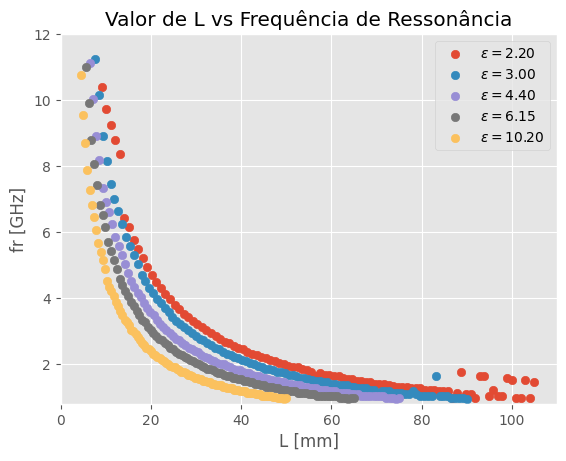

In [54]:
# Scatter plot with the filtered data
plt.style.use("ggplot")
plt.title('Valor de L vs Frequência de Ressonância')
plt.xlabel('L [mm]')
plt.ylabel('fr [GHz]')
plt.xlim([0, 110])
plt.ylim([0.8, 12])
plt.scatter(df_final_22['L'], df_final_22 ['Freq'])
plt.scatter(df_final_30['L'], df_final_30 ['Freq'])
plt.scatter(df_final_44['L'], df_final_44 ['Freq'])
plt.scatter(df_final_615['L'], df_final_615 ['Freq'])
plt.scatter(df_final_102['L'], df_final_102 ['Freq'])
plt.legend(["$\epsilon = 2.20$",
            "$\epsilon = 3.00$",
            "$\epsilon = 4.40$",
            "$\epsilon = 6.15$",
            "$\epsilon = 10.20$"])

plt.show()

---